## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [2]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 9       6       7       9       4       

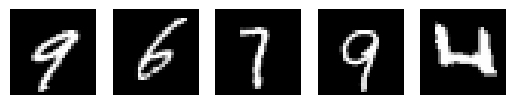

In [4]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [5]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], -1)                                    # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], -1)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [6]:
model = keras.models.Sequential([

    layers.Input(shape=(784,)),            # Input layer for flattened 28x28 images
    layers.Dense(256, activation='relu'),  # First hidden layer
    layers.Dropout(0.2),                   # Dropout to reduce overfitting
    layers.Dense(128, activation='relu'),  # Second hidden layer
    layers.Dropout(0.2),                   # Dropout again
    layers.Dense(10, activation='softmax') # Output layer for 10 classes

])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

n_epochs = 10              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit( x_train_flatten, y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(x_validation, y_validation),
    verbose=2)

Epoch 1/10
98/98 - 4s - 39ms/step - accuracy: 0.7185 - loss: 9.3664 - val_accuracy: 0.8834 - val_loss: 0.8052
Epoch 2/10
98/98 - 3s - 32ms/step - accuracy: 0.7954 - loss: 1.3509 - val_accuracy: 0.8782 - val_loss: 0.4861
Epoch 3/10
98/98 - 4s - 41ms/step - accuracy: 0.8310 - loss: 0.7933 - val_accuracy: 0.8939 - val_loss: 0.3927
Epoch 4/10
98/98 - 3s - 27ms/step - accuracy: 0.8551 - loss: 0.6032 - val_accuracy: 0.9078 - val_loss: 0.3488
Epoch 5/10
98/98 - 2s - 25ms/step - accuracy: 0.8770 - loss: 0.4911 - val_accuracy: 0.9169 - val_loss: 0.2981
Epoch 6/10
98/98 - 4s - 39ms/step - accuracy: 0.8878 - loss: 0.4335 - val_accuracy: 0.9293 - val_loss: 0.2781
Epoch 7/10
98/98 - 2s - 20ms/step - accuracy: 0.9018 - loss: 0.3753 - val_accuracy: 0.9358 - val_loss: 0.2534
Epoch 8/10
98/98 - 2s - 25ms/step - accuracy: 0.9096 - loss: 0.3366 - val_accuracy: 0.9370 - val_loss: 0.2440
Epoch 9/10
98/98 - 2s - 21ms/step - accuracy: 0.9185 - loss: 0.2926 - val_accuracy: 0.9421 - val_loss: 0.2252
Epoch 10/1

### **Evaluate**
Evaluate your model on test data.

And Show some results

Loss =  0.19721736013889313
Accuracy =  94.8199987411499 %


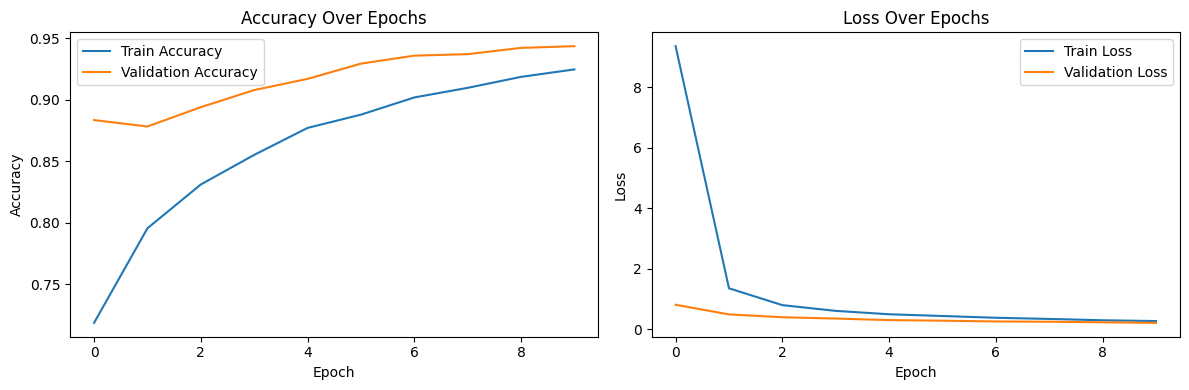

In [8]:
results = model.evaluate(x_test_flatten, y_test, verbose=0)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()



Lets show our results on images from testing dataset

Label: 
9  8  4  8  1  

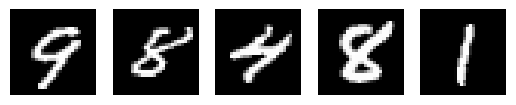

Predicted value: 
9  8  4  8  1  

In [9]:
n = 5  # Number of images to see predictions on

index = np.random.choice(len(x_test), n, replace=False)  # choose random index from test data
print("Label: ")

for i, ind in enumerate(index):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test[ind], cmap='gray')  # Show original 28x28 image
    plt.axis("off")
    print(y_test[ind], end="  ")  # Print true label

plt.show()

print("Predicted value: ")

# Now let's print the predictions
for i, ind in enumerate(index):
    pred = model.predict(x_test_flatten[ind].reshape(1, -1), verbose=0)  # Get prediction
    digit = np.argmax(pred)  # Choose the class with highest probability
    print(digit, end="  ")